# Importação das bibliotecas usadas

In [605]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Leitura dos dados

In [606]:
covidData = pd.read_csv('covid19-data.csv')

# Exploração dos dados

In [607]:
covidData.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Colunas do dataset
- sex: 1 for female and 2 for male.
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
- degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [608]:
covidData.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

## Descrição das colunas 

In [609]:
covidData.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


# Info do dataframe

In [610]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

# Shape do dataframe

In [611]:
covidData.shape

(1048575, 21)

# Convertendo o campo de data de morte para boolean, "1" se a pessoa morreu e "2" se a pessoa não morreu

In [612]:
covidData['DATE_DIED'] = covidData['DATE_DIED'].map(lambda x: 2 if x == '9999-99-99' else 1)
covidData['DATE_DIED'].head()

0    1
1    1
2    1
3    1
4    1
Name: DATE_DIED, dtype: int64

# 4 - Mostre a distribuição de frequência de todas as variáveis (frequência e porcentagem)

In [613]:
distributions = {}

for col in covidData.columns:
  freq = covidData[col].value_counts()
  percent = (freq / freq.sum()) * 100
  
  temporaryDataFrame = pd.DataFrame({'Frequência': freq, 'Porcentagem': percent})

  distributions[col] = temporaryDataFrame

distributionsData = pd.concat(distributions, axis=1)
distributionsData

USMER             MEDICAL_UNIT                    SEX               
    Frequência Porcentagem   Frequência Porcentagem Frequência Porcentagem   
2     662903.0   63.219417        169.0    0.016117   523511.0   49.925947  \
1     385672.0   36.780583        151.0    0.014400   525064.0   50.074053   
12         NaN         NaN     602995.0   57.506139        NaN         NaN   
4          NaN         NaN     314405.0   29.984026        NaN         NaN   
6          NaN         NaN      40584.0    3.870396        NaN         NaN   
..         ...         ...          ...         ...        ...         ...   
114        NaN         NaN          NaN         NaN        NaN         NaN   
116        NaN         NaN          NaN         NaN        NaN         NaN   
111        NaN         NaN          NaN         NaN        NaN         NaN   
121        NaN         NaN          NaN         NaN        NaN         NaN   
113        NaN         NaN          NaN         NaN        NaN         NaN   

    PATIENT_TYPE              DATE_DIED              ...    OBESITY   
      Frequência Porcentagem Frequência Porcentagem  ... Frequência   
2       200031.0   19.076461   971633.0   92.662232  ...   885727.0  \
1       848544.0   80.923539    76942.0    7.337768  ...   159816.0   
12           NaN         NaN        NaN         NaN  ...        NaN   
4            NaN         NaN        NaN         NaN  ...        NaN   
6            NaN         NaN        NaN         NaN  ...        NaN   
..           ...         ...        ...         ...  ...        ...   
114          NaN         NaN        NaN         NaN  ...        NaN   
116          NaN         NaN        NaN         NaN  ...        NaN   
111          NaN         NaN        NaN         NaN  ...        NaN   
121          NaN         NaN        NaN         NaN  ...        NaN   
113          NaN         NaN        NaN         NaN  ...        NaN   

                RENAL_CHRONIC                TOBACCO               
    Porcentagem    Frequência Porcentagem Frequência Porcentagem   
2     84.469590     1026665.0   97.910498   960979.0   91.646186  \
1     15.241256       18904.0    1.802828    84376.0    8.046730   
12          NaN           NaN         NaN        NaN         NaN   
4           NaN           NaN         NaN        NaN         NaN   
6           NaN           NaN         NaN        NaN         NaN   
..          ...           ...         ...        ...         ...   
114         NaN           NaN         NaN        NaN         NaN   
116         NaN           NaN         NaN        NaN         NaN   
111         NaN           NaN         NaN        NaN         NaN   
121         NaN           NaN         NaN        NaN         NaN   
113         NaN           NaN         NaN        NaN         NaN   

    CLASIFFICATION_FINAL                    ICU              
              Frequência Porcentagem Frequência Porcentagem  
2                 1851.0    0.176525   175685.0   16.754643  
1                 8601.0    0.820256    16858.0    1.607706  
12                   NaN         NaN        NaN         NaN  
4                 3122.0    0.297737        NaN         NaN  
6               128133.0   12.219727        NaN         NaN  
..                   ...         ...        ...         ...  
114                  NaN         NaN        NaN         NaN  
116                  NaN         NaN        NaN         NaN  
111                  NaN         NaN        NaN         NaN  
121                  NaN         NaN        NaN         NaN  
113                  NaN         NaN        NaN         NaN  

[121 rows x 42 columns]

# 5 - Identifique os tipos de dados para cada variável (categórico, numérico...)

In [614]:
covidDataColumns = {
  'USMER': 'Categórica',
  'MEDICAL_UNIT': 'Catégorica',
  'SEX': 'Catégorica',
  'PATIENT_TYPE': 'Categórica',
  'DATE_DIED': 'Categórica',
  'INTUBED': 'Categórica',
  'PNEUMONIA': 'Categórica',
  'AGE': 'Numérica',
  'PREGNANT': 'Categórica',
  'DIABETES': 'Categórica',
  'COPD': 'Categórica',
  'ASTHMA': 'Categórica',
  'INMSUPR': 'Categórica',
  'HIPERTENSION': 'Categórica',
  'OTHER_DISEASE': 'Categórica',
  'CARDIOVASCULAR': 'Categórica',
  'OBESITY': 'Categórica',
  'RENAL_CHRONIC': 'Categórica',
  'TOBACCO': 'Categórica',
  'CLASIFFICATION_FINAL': 'Categórica',
  'ICU': 'Categórica',
}

temporaryData = []

for col in covidData.columns:
  dataType = covidData[col].dtype
  dataClassification = covidDataColumns[col]
      
  temporaryData.append({'Variável': col, 'Tipo de dado': dataType, 'Classificação': dataClassification})

typesData = pd.DataFrame(temporaryData)
typesData

,Variável,Tipo de dado,Classificação
0,USMER,int64,Categórica
1,MEDICAL_UNIT,int64,Catégorica
2,SEX,int64,Catégorica
3,PATIENT_TYPE,int64,Categórica
4,DATE_DIED,int64,Categórica
5,INTUBED,int64,Categórica
6,PNEUMONIA,int64,Categórica
7,AGE,int64,Numérica
8,PREGNANT,int64,Categórica
9,DIABETES,int64,Categórica


# 6 - Apresente cálculos estatísticos valor mínimo, máximo, média, moda, desvio padrão, soma para variáveis numéricas. Apresente a descrição para variáveis categóricas.

In [615]:
covidDataDescribe = covidData.describe().T

covidDataColumnsDescription = {
  'USMER': 'Dado categórico, pois representa diferentes níveis de unidades médicas usando valores numéricos',
  'MEDICAL_UNIT': 'Dado categórico, pois representa diferentes tipos de instituições de saúde',
  'SEX': 'Dado categórico, pois representa duas categorias distintas (feminino e masculino)',
  'PATIENT_TYPE': 'Dado categórico, pois representa duas categorias distintas (liberado para casa e internamento)',
  'DATE_DIED': 'Dado temporal, pois representa a data de falecimento do paciente.',
  'INTUBED': 'Indica se o paciente estava conectado ao respirador.',
  'PNEUMONIA': 'Indica se o paciente já tem inflamação dos pulmões ou não.',
  'AGE': 'Dado numérico, pois representa a idade do paciente como um valor numérico.',
  'PREGNANT': 'Indica se a paciente está grávida ou não.',
  'DIABETES': 'Dado categórico, pois representa duas categorias distintas (diabético ou não diabético)',
  'COPD': 'Dado categórico, pois representa duas categorias distintas (com doença pulmonar obstrutiva crônica ou sem doença pulmonar obstrutiva crônica)',
  'ASTHMA': 'Dado categórico, pois representa duas categorias distintas (com asma ou sem asma)',
  'INMSUPR': 'Dado categórico, pois representa duas categorias distintas (imunossuprimido ou não imunossuprimido)',
  'HIPERTENSION': 'Indica se o paciente tem hipertensão ou não.',
  'OTHER_DISEASE': 'Dado categórico, pois representa duas categorias distintas (com outra doença ou sem outra doença)',
  'CARDIOVASCULAR': 'Dado categórico, pois representa duas categorias distintas (com doença cardiovascular ou sem doença cardiovascular)',
  'OBESITY': 'Dado categórico, pois representa duas categorias distintas (obeso ou não obeso)',
  'RENAL_CHRONIC': 'Indica se o paciente tem doença renal crônica ou não.',
  'TOBACCO': 'Indica se o paciente é tabagista.',
  'CLASIFFICATION_FINAL': 'Resultados de testes ambiciosos. Os valores 1-3 significam que o paciente foi diagnosticado com covid em diferentes graus. 4 ou superior significa que o paciente não é portador de covid ou que o teste é inconclusivo.',
  'ICU': 'Indica se o paciente foi internado em uma Unidade de Terapia Intensiva.'
}


covidDataDescribe['categorical_description'] = covidDataDescribe.index.map(lambda x: covidDataColumnsDescription[x])
covidDataDescribe

,count,mean,std,min,25%,50%,75%,max,categorical_description
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0,"Dado categórico, pois representa diferentes ní..."
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0,"Dado categórico, pois representa diferentes ti..."
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0,"Dado categórico, pois representa duas categori..."
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0,"Dado categórico, pois representa duas categori..."
DATE_DIED,1048575.0,1.926622,0.260756,1.0,2.0,2.0,2.0,2.0,"Dado temporal, pois representa a data de falec..."
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0,Indica se o paciente estava conectado ao respi...
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0,Indica se o paciente já tem inflamação dos pul...
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0,"Dado numérico, pois representa a idade do paci..."
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0,Indica se a paciente está grávida ou não.
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0,"Dado categórico, pois representa duas categori..."


## Descrição para variáveis categóricas

In [616]:
categoricalColumns = covidData.drop(['AGE'], axis=1)

data = {}
for col in categoricalColumns:
  category_counts = covidData[col].value_counts()
  data[col] = category_counts

df = pd.DataFrame(data)

half_cols = df.shape[1] // 2

first_half = df.iloc[:, :half_cols]
second_half = df.iloc[:, half_cols:]

print("Primeira Metade das Colunas:")
print(first_half)

print("Restante das Colunas:")
print(second_half)

Primeira Metade das Colunas:
       USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE  DATE_DIED   INTUBED   
1   385672.0         151.0  525064.0      848544.0    76942.0   33656.0  \
2   662903.0         169.0  523511.0      200031.0   971633.0  159050.0   
3        NaN       19175.0       NaN           NaN        NaN       NaN   
4        NaN      314405.0       NaN           NaN        NaN       NaN   
5        NaN        7244.0       NaN           NaN        NaN       NaN   
6        NaN       40584.0       NaN           NaN        NaN       NaN   
7        NaN         891.0       NaN           NaN        NaN       NaN   
8        NaN       10399.0       NaN           NaN        NaN       NaN   
9        NaN       38116.0       NaN           NaN        NaN       NaN   
10       NaN        7873.0       NaN           NaN        NaN       NaN   
11       NaN        5577.0       NaN           NaN        NaN       NaN   
12       NaN      602995.0       NaN           NaN        NaN       NaN

In [617]:
print("Restante das Colunas:")
print(second_half)

Restante das Colunas:
       ASTHMA    INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR   
1     31572.0    14170.0      162729.0        28040.0         20769.0  \
2   1014024.0  1031001.0      882742.0      1015490.0       1024730.0   
3         NaN        NaN           NaN            NaN             NaN   
4         NaN        NaN           NaN            NaN             NaN   
5         NaN        NaN           NaN            NaN             NaN   
6         NaN        NaN           NaN            NaN             NaN   
7         NaN        NaN           NaN            NaN             NaN   
8         NaN        NaN           NaN            NaN             NaN   
9         NaN        NaN           NaN            NaN             NaN   
10        NaN        NaN           NaN            NaN             NaN   
11        NaN        NaN           NaN            NaN             NaN   
12        NaN        NaN           NaN            NaN             NaN   
13        NaN        NaN     

# 7 - Mostre se há valores faltantes em alguma variável. Se houver, apresente o procedimento escolhido para tratar a base.

In [618]:
missing_values = covidData.isnull().sum()
missing_values

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

# 8 - Identifique por meio de gráficos, qual mapeamento visual é o mais indicado para as variáveis e, se você julgar que aquele paradigma visual realmente é a melhor escolha, apresente seus dados com a visualização. Descreva os insights que a visualização proporcionou para os seus dados. Deve existir pelo menos 3 gráficos com avaliação.

## Avaliando outliers para "age"

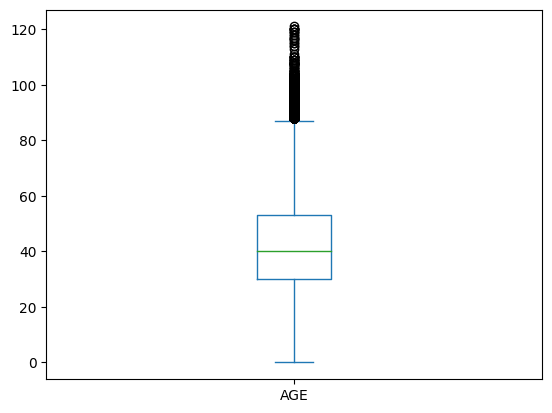

In [619]:
covidData.AGE.plot.box();

> Com base na análise dos dados, podemos observar que existe uma quantia de outliers para a variável idade sendo acima de 80

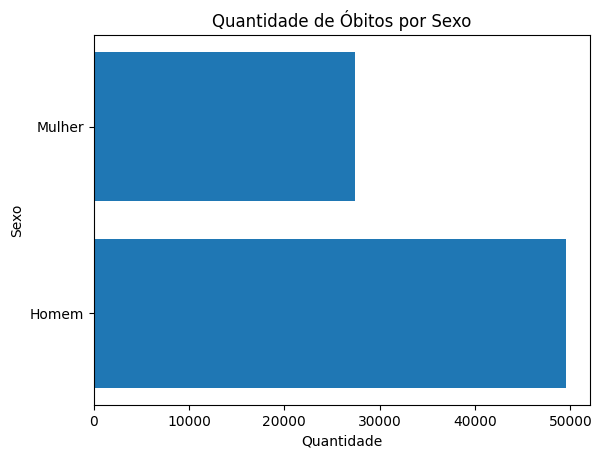

In [620]:
deceased = covidData[covidData['DATE_DIED'] == 1]

gender_counts = deceased['SEX'].value_counts()

plt.barh(['Homem', 'Mulher'], gender_counts.values)
plt.xlabel('Quantidade')
plt.ylabel('Sexo')
plt.title('Quantidade de Óbitos por Sexo')
plt.show()


> Com base na análise dos dados, podemos observar que houve uma diferença significativa na quantidade de óbitos entre homens e mulheres. Segundo os registros, a quantidade de homens que faleceram devido à COVID-19 foi consideravelmente maior em comparação com o número de mulheres. Essa disparidade na taxa de óbitos entre os sexos pode ser atribuída a uma série de fatores. 

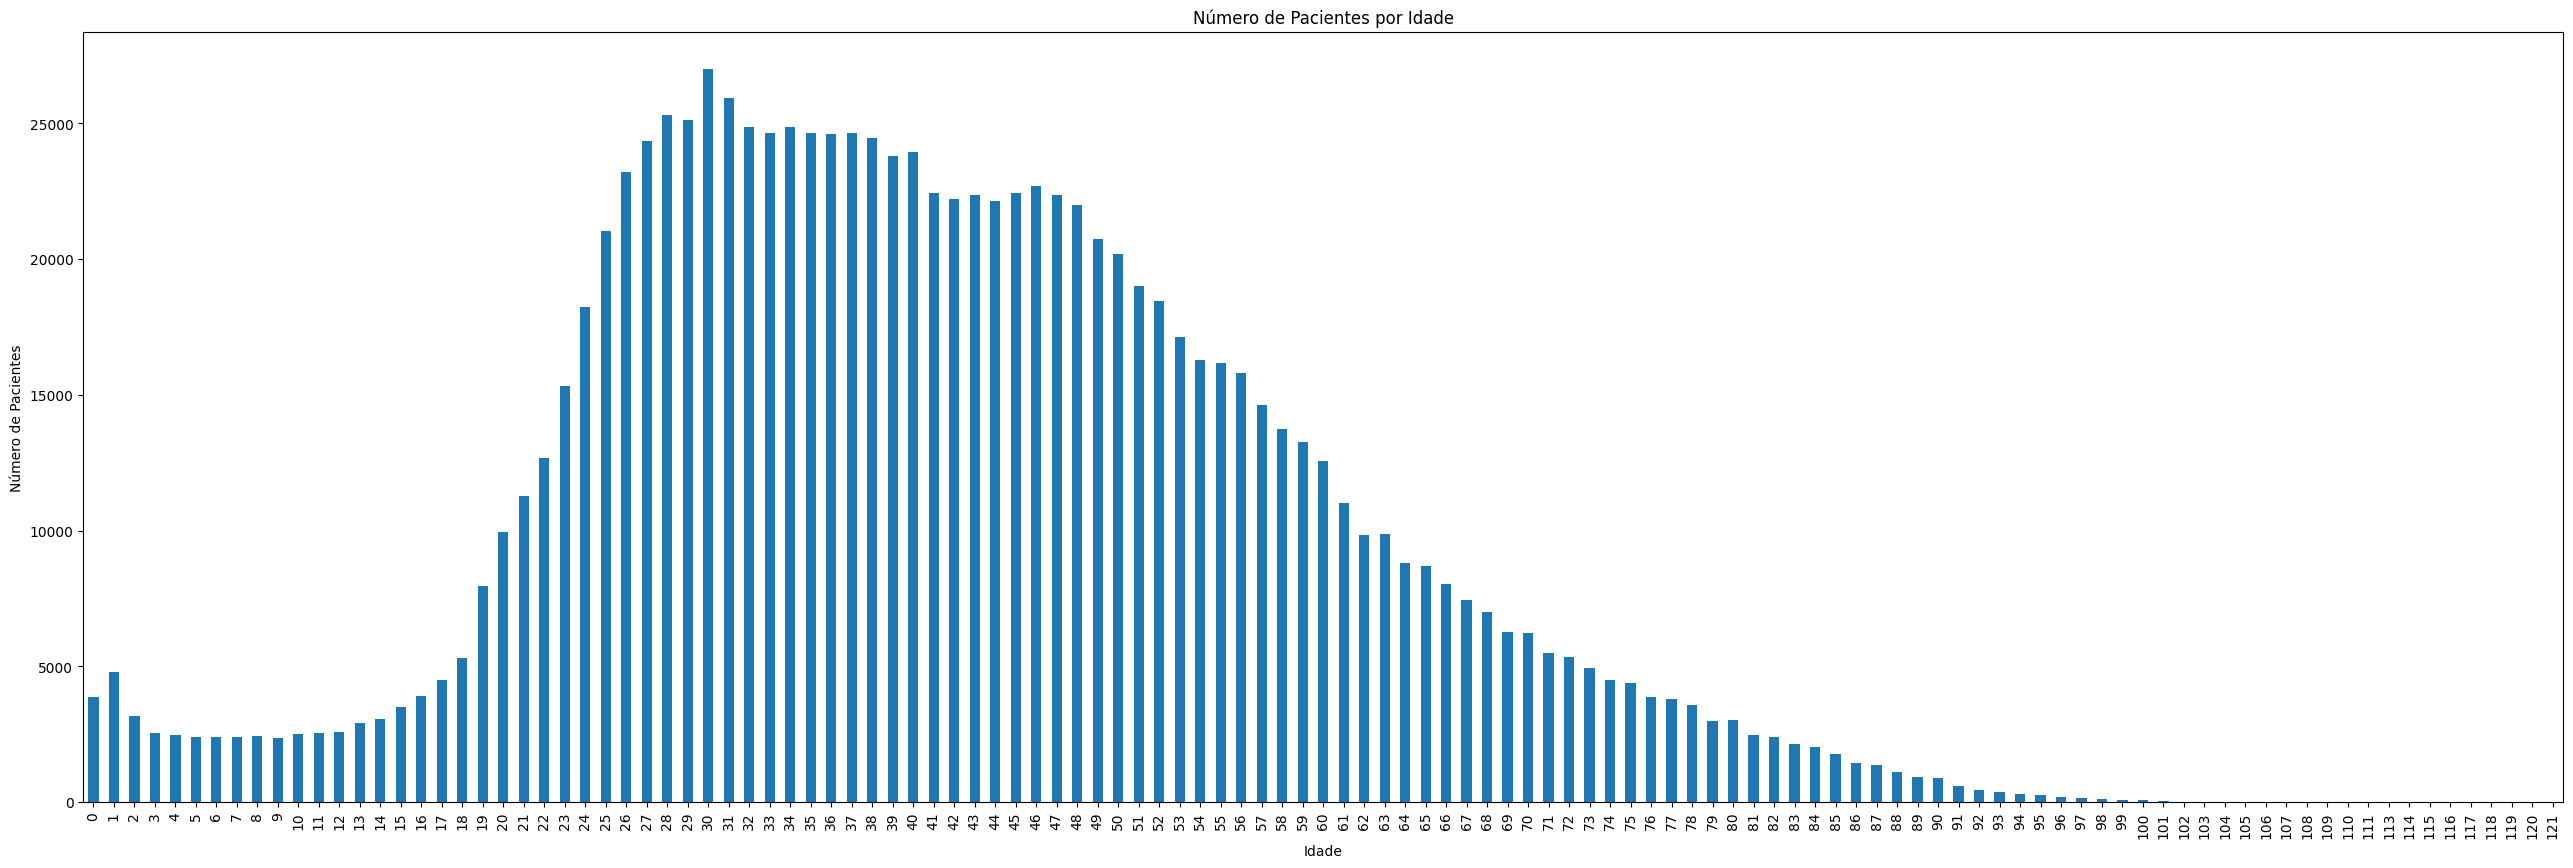

In [621]:
plt.figure(figsize=(32, 10))
covidData['AGE'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.title('Número de Pacientes por Idade')
plt.show()

> Com base na análise dos dados, podemos observar que pacientes com uma idade entre 26 e 35 representam a maior quantidade.

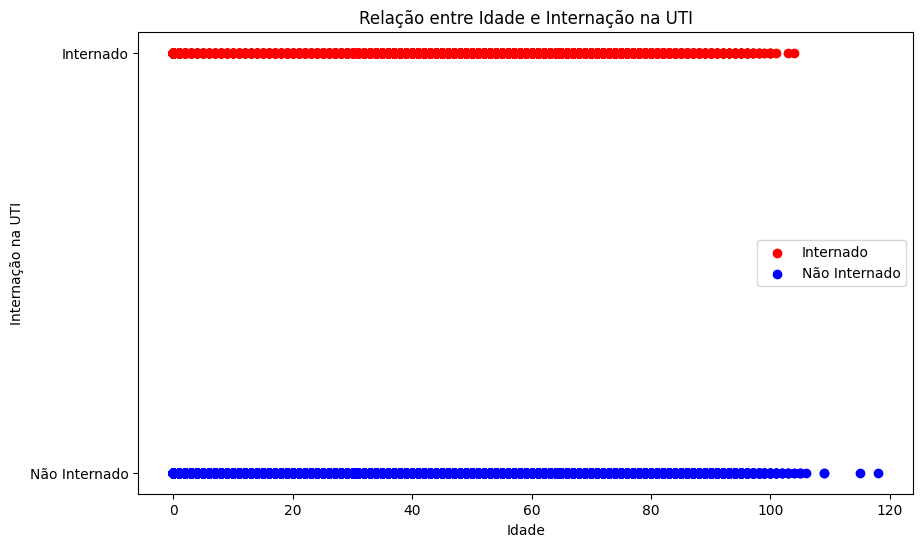

In [622]:
plt.figure(figsize=(10, 6))
interned = covidData[covidData['ICU'] == 1]
not_interned = covidData[covidData['ICU'] == 2]
plt.scatter(interned['AGE'], [1] * len(interned), label='Internado', color='red')
plt.scatter(not_interned['AGE'], [0] * len(not_interned), label='Não Internado', color='blue')
plt.xlabel('Idade')
plt.ylabel('Internação na UTI')
plt.title('Relação entre Idade e Internação na UTI')
plt.yticks([0, 1], ['Não Internado', 'Internado'])
plt.legend()
plt.show()


> Com base na análise de dados, podemos perceber que o fator idade não foi um diferencial para internação na UTI ou não internação.

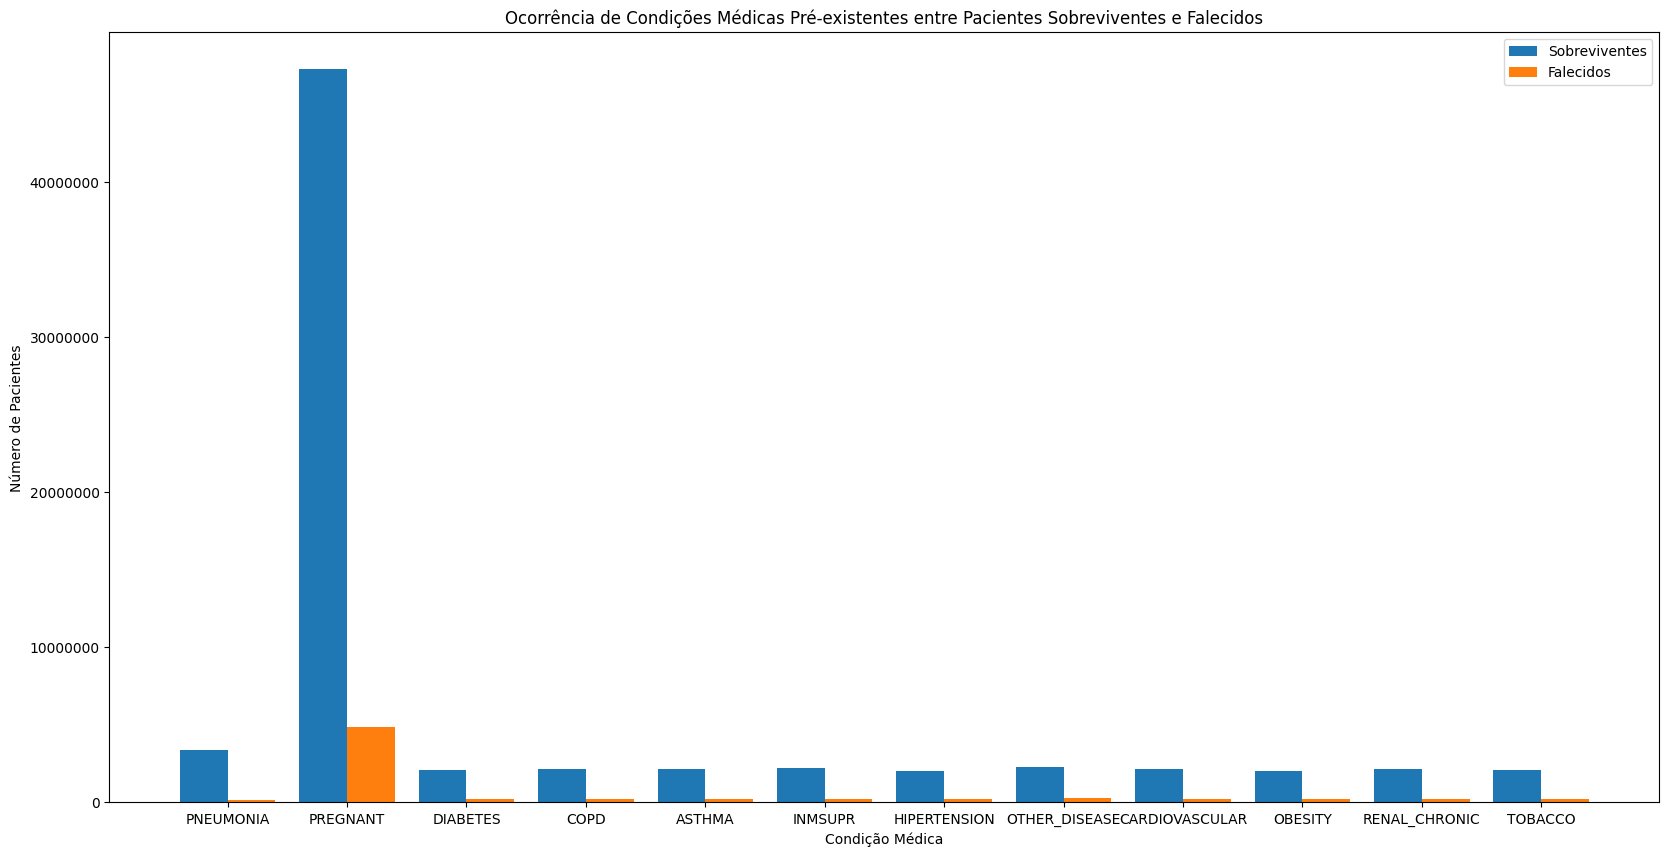

In [623]:
plt.figure(figsize=(20, 10))
conditions = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

survivors = covidData[covidData['DATE_DIED'] == 2][conditions].sum().values

deceased = covidData[covidData['DATE_DIED'] == 1][conditions].sum().values

x = range(len(conditions))
width = 0.4
plt.bar(x, survivors, width, label='Sobreviventes')
plt.bar([i + width for i in x], deceased, width, label='Falecidos')
plt.xlabel('Condição Médica')
plt.ylabel('Número de Pacientes')
plt.title('Ocorrência de Condições Médicas Pré-existentes entre Pacientes Sobreviventes e Falecidos')
plt.xticks([i + width / 2 for i in x], conditions)
plt.legend()

plt.ticklabel_format(style='plain', axis='y')

plt.show()



> Com base na análise de dados, podemos observar que a condição mais impactante de mortes foi a de "grávida". As demais condições não possui uma grande quantidade de falecidos. Também podemos observar que a condição de grávida é a que mais está presente.

# 9 - Apresente a matriz de correlação entre as variáveis. Discuta quais são correlacionadas (forte/fraco).

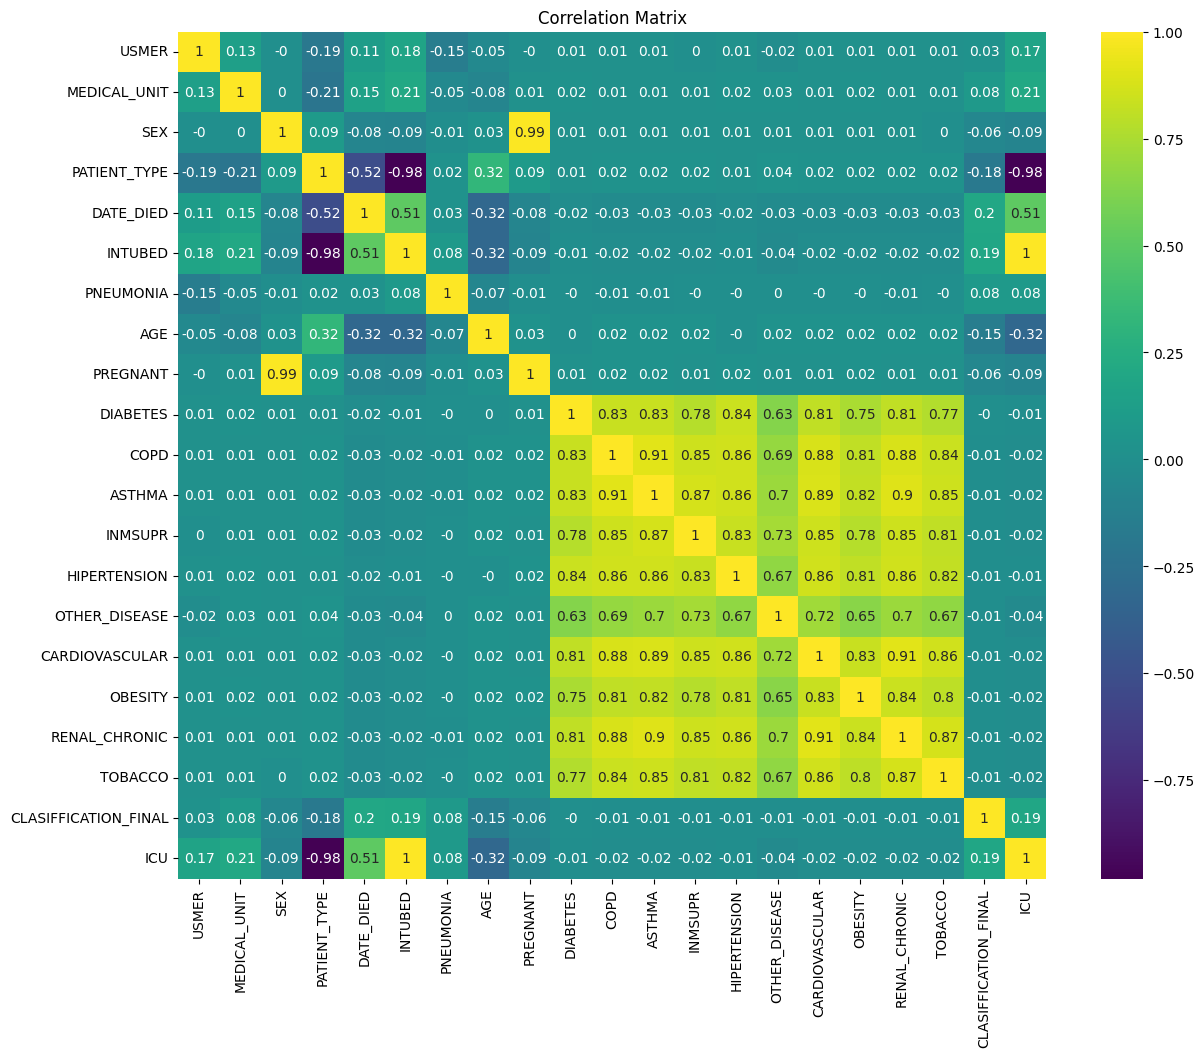

In [624]:
corr_matrix = np.round(np.corrcoef(covidData, rowvar=False), 2)

plt.figure(figsize=(14,11))
sns.heatmap(corr_matrix, cmap='viridis', annot=True,
            xticklabels=covidData.columns, yticklabels=covidData.columns
           )
plt.title("Correlation Matrix");

# 10 - Apresente a partir do PCA, qual a variância explicada de acordo com os componentes principais. Apresente qual é a variável que mais tem influência no sistema de classificação/predição.

In [625]:
pca = PCA()
principalCOmponents = pca.fit_transform(covidData)

explainedVariance = pca.explained_variance_ratio_

mostInfluentialVariable = covidData.columns[explainedVariance.argmax()]

print("Variância explicada pelos componentes principais:")
for i, variance in enumerate(explainedVariance):
    print(f"{covidData.columns[i]}: {variance:.2f}")

print(f"\nVariável mais influente: {mostInfluentialVariable}")

Variância explicada pelos componentes principais:
USMER: 0.50
MEDICAL_UNIT: 0.38
SEX: 0.04
PATIENT_TYPE: 0.04
DATE_DIED: 0.02
INTUBED: 0.00
PNEUMONIA: 0.00
AGE: 0.00
PREGNANT: 0.00
DIABETES: 0.00
COPD: 0.00
ASTHMA: 0.00
INMSUPR: 0.00
HIPERTENSION: 0.00
OTHER_DISEASE: 0.00
CARDIOVASCULAR: 0.00
OBESITY: 0.00
RENAL_CHRONIC: 0.00
TOBACCO: 0.00
CLASIFFICATION_FINAL: 0.00
ICU: 0.00

Variável mais influente: USMER
